<a href="https://colab.research.google.com/github/ninkanatalia04/SistemKeamananCerdas/blob/main/Program1_Encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INSIDER THREAT USING TRANSFORMERS ON USER ACTIVITY LOGS**

**Topik Riset:**

"Deteksi Ancaman Internal Menggunakan Transformer untuk Menganalisis Log Aktivitas Pengguna"

**Deskripsi:**

Transformer digunakan untuk menganalisis aktivitas pengguna secara menyeluruh. Model ini dilatih untuk mendeteksi pola akses yang tidak biasa oleh pengguna internal, seperti akses data di luar jam kerja atau aktivitas mencurigakan lainnya, dengan mempelajari urutan akses file dan sistem.

**Novelty:**

Sedang hingga tinggi. Insider threat sudah menjadi fokus penelitian dengan berbagai metode deteksi perilaku anomali. Namun, Transformer, dengan kemampuannya untuk menangkap perubahan perilaku yang halus dalam urutan log, menawarkan pendekatan baru yang dapat meningkatkan performa deteksi.


**Dataset: CERT Insider threat**

Dataset ini berisi data aktivitas pengguna yang mencurigakan dan bisa digunakan untuk mendeteksi Insider Threat. Model Transformer bisa mengenali pola akses yang anomali berdasarkan log pengguna.

URL: https://www.kaggle.com/datasets/nitishabharathi/cert-insider-threat


# **Importing Modules and Libraries**

In [2]:
# importing required libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import pickle
from os import path

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


# **Importing Datasets**

In [3]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
!ls


Mounted at /content/gdrive
gdrive	sample_data


In [4]:
import os
os.chdir("/content/gdrive/My Drive/dataset")
!ls


email.csv  model_best_fold_1.pt


In [5]:
data = pd.read_csv('email.csv')


In [6]:
data.head(n=5)


,id,date,user,pc,to,cc,bcc,from,size,attachments,content
0,{R3I7-S4TX96FG-8219JWFF},01/02/2010 07:11:45,LAP0338,PC-5758,Dean.Flynn.Hines@dtaa.com;Wade_Harrison@lockhe...,Nathaniel.Hunter.Heath@dtaa.com,NaN,Lynn.Adena.Pratt@dtaa.com,25830,0,middle f2 systems 4 july techniques powerful d...
1,{R0R9-E4GL59IK-2907OSWJ},01/02/2010 07:12:16,MOH0273,PC-6699,Odonnell-Gage@bellsouth.net,NaN,NaN,MOH68@optonline.net,29942,0,the breaking called allied reservations former...
2,{G2B2-A8XY58CP-2847ZJZL},01/02/2010 07:13:00,LAP0338,PC-5758,Penelope_Colon@netzero.com,NaN,NaN,Lynn_A_Pratt@earthlink.net,28780,0,slowly this uncinus winter beneath addition ex...
3,{A3A9-F4TH89AA-8318GFGK},01/02/2010 07:13:17,LAP0338,PC-5758,Judith_Hayden@comcast.net,NaN,NaN,Lynn_A_Pratt@earthlink.net,21907,0,400 other difficult land cirrocumulus powered ...
4,{E8B7-C8FZ88UF-2946RUQQ},01/02/2010 07:13:28,MOH0273,PC-6699,Bond-Raymond@verizon.net;Alea_Ferrell@msn.com;...,NaN,Odonnell-Gage@bellsouth.net,MOH68@optonline.net,17319,0,this kmh october holliswood number advised unu...


In [7]:
# Sample 10% of your data
data = data.sample(frac=0.1, random_state=42)

In [8]:
# Threshold ukuran (25KB)
size_threshold = 25000

# Fungsi untuk menentukan aktivitas di luar jam kerja
def is_after_hours(date_str):
    hour = pd.to_datetime(date_str).hour  # Ekstrak jam dari 'date'
    return hour < 8 or hour > 18  # Jam kerja dianggap antara 08:00 - 18:00

# Membuat label (1 = mencurigakan, 0 = normal)
data['label'] = data.apply(lambda x:
    1 if x['size'] > size_threshold or is_after_hours(x['date']) else 0, axis=1)

# Cek hasil labeling
print(data[['user', 'date', 'size', 'label']].head())


            user                 date   size  label
1375085  HWH0646  09/08/2010 09:48:21  53433      1
1760687  EMW0772  11/18/2010 11:40:48  23746      0
489761   HAD0246  03/29/2010 14:40:35  20984      0
670295   ASB0796  04/30/2010 10:57:44  33996      1
2611719  HCW0419  05/12/2011 11:45:23  37670      1


In [9]:
# Misalkan kolom yang berisi label adalah 'type'
# Menampilkan nilai unik dan jumlah setiap kelas
kelas = data['label'].value_counts()
print(kelas)

# Menampilkan jumlah kelas unik
jumlah_kelas = data['label'].nunique()
print(f"Jumlah kelas unik: {jumlah_kelas}")


label
1    176616
0     86382
Name: count, dtype: int64
Jumlah kelas unik: 2


In [10]:
data.shape


(262998, 12)

# **Data Visualization**

In [11]:
print(data.columns)


Index(['id', 'date', 'user', 'pc', 'to', 'cc', 'bcc', 'from', 'size',
       'attachments', 'content', 'label'],
      dtype='object')


In [12]:
print(data['label'].value_counts())


label
1    176616
0     86382
Name: count, dtype: int64


Jumlah kelas unik: 2


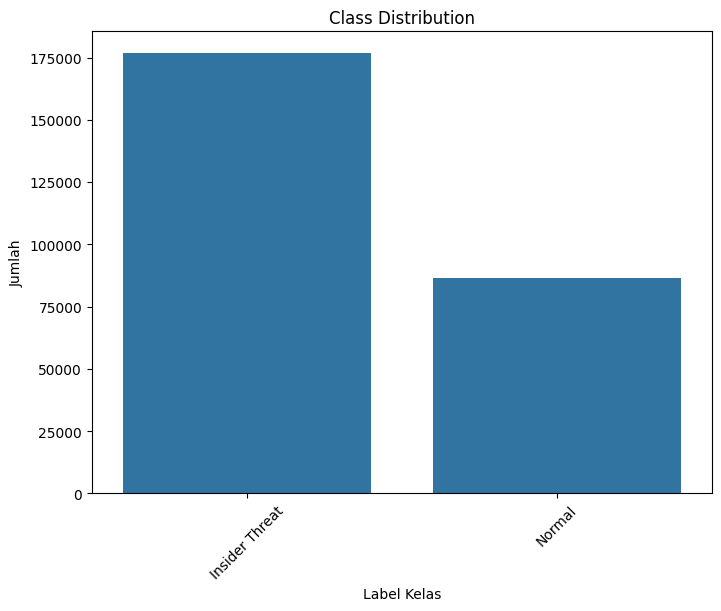

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Misalkan Anda telah menyiapkan DataFrame data
# Gantilah 'label' dengan nilai string sesuai label Anda
data['label'] = data['label'].replace({
    0: "Normal",
    1: "Insider Threat",
})

# Hitung jumlah kelas unik
jumlah_kelas = data['label'].nunique()
print(f"Jumlah kelas unik: {jumlah_kelas}")

# Visualisasi distribusi kelas dengan nama
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=data)
plt.title('Class Distribution')
plt.xlabel('Label Kelas')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)  # Memutar label sumbu x jika perlu
plt.show()


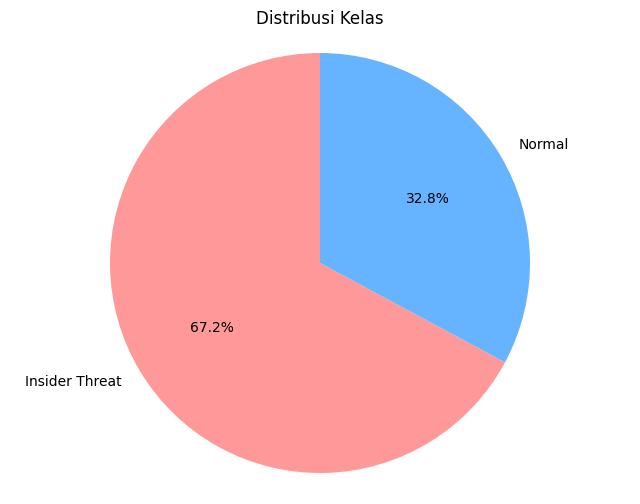

In [14]:
# Hitung jumlah setiap kelas
kelas_count = data['label'].value_counts()

# Buat pie chart
plt.figure(figsize=(8, 6))
plt.pie(kelas_count, labels=kelas_count.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
plt.axis('equal')  # Untuk membuat pie chart menjadi lingkaran
plt.title('Distribusi Kelas')
plt.show()


In [15]:
# Kembali ke format numerik
data['label'] = data['label'].replace({
    "Normal": 0,
    "Insider Threat": 1
}).astype(int)  # Pastikan kolom menjadi integer

# Pastikan nilai kembali ke format numerik
print(data['label'].value_counts())


label
1    176616
0     86382
Name: count, dtype: int64


# **DATA SPLITTING**

In [16]:
# 1. Mengimpor Modul yang Diperlukan
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from os import path
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Memisahkan fitur dan target
X = data.drop('label', axis=1)  # Fitur (semua kolom kecuali 'Label')
y = data['label']                # Variabel target (kolom 'Label')

# Membagi data menjadi set pelatihan (80%) dan set pengujian (20%)
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X, y, test_size=0.2, random_state=50)

# Menampilkan informasi tentang ukuran set
print(f'Ukuran set pelatihan: {X_train_bin.shape[0]}')
print(f'Ukuran set pengujian: {X_test_bin.shape[0]}')


Ukuran set pelatihan: 210398
Ukuran set pengujian: 52600


In [18]:
# Verify the shapes of the resulting datasets
print(f"Training data shape: {X_train_bin.shape}")
print(f"Testing data shape: {X_test_bin.shape}")
print(f"Training labels shape: {y_train_bin.shape}")
print(f"Testing labels shape: {y_test_bin.shape}")


Training data shape: (210398, 11)
Testing data shape: (52600, 11)
Training labels shape: (210398,)
Testing labels shape: (52600,)


# **LIBRARY TRANSFORMER**

Instalasi Paket yang Diperlukan

Instalasi paket: Menginstal berbagai paket yang diperlukan untuk pembelajaran mesin dan pemrosesan data.

In [19]:
!pip install transformers tensorflow scikit-learn matplotlib pandas


In [20]:
!pip install transformers torch scikit-learn


# **1. TRANSFORMER "ENCODER"**

# **CLASSIFICATION Non-Tuning**

Fold 1
Early stopping triggered at epoch 6
Accuracy for fold 1: 67.09%
F1 Score for fold 1: 0.5387
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      8656
           1       0.67      1.00      0.80     17644

    accuracy                           0.67     26300
   macro avg       0.34      0.50      0.40     26300
weighted avg       0.45      0.67      0.54     26300



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


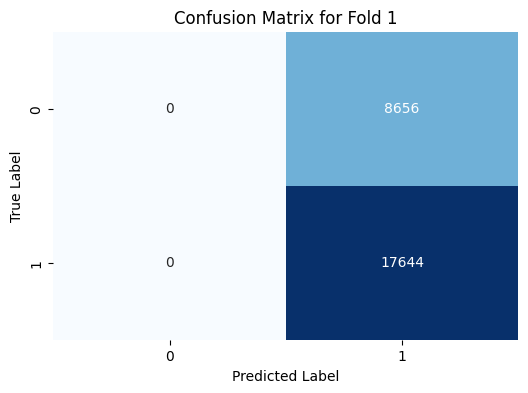

Fold 2
Early stopping triggered at epoch 6
Accuracy for fold 2: 67.42%
F1 Score for fold 2: 0.5430
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      8568
           1       0.67      1.00      0.81     17732

    accuracy                           0.67     26300
   macro avg       0.34      0.50      0.40     26300
weighted avg       0.45      0.67      0.54     26300



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


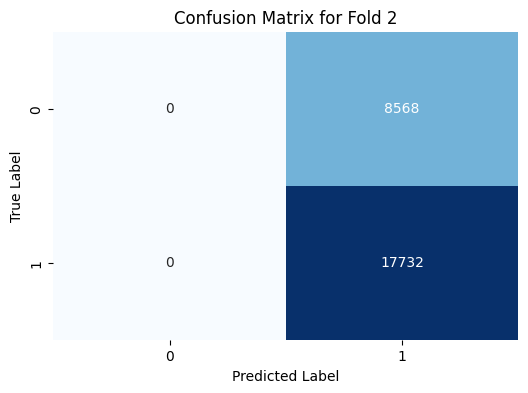

Fold 3
Early stopping triggered at epoch 6
Accuracy for fold 3: 66.97%
F1 Score for fold 3: 0.5372
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      8688
           1       0.67      1.00      0.80     17612

    accuracy                           0.67     26300
   macro avg       0.33      0.50      0.40     26300
weighted avg       0.45      0.67      0.54     26300



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


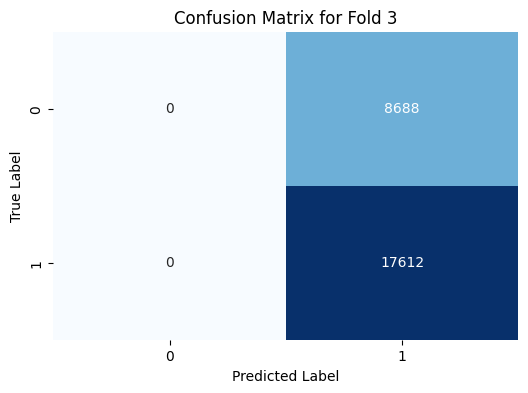

Fold 4
Early stopping triggered at epoch 6
Accuracy for fold 4: 67.62%
F1 Score for fold 4: 0.5455
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      8517
           1       0.68      1.00      0.81     17783

    accuracy                           0.68     26300
   macro avg       0.34      0.50      0.40     26300
weighted avg       0.46      0.68      0.55     26300



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


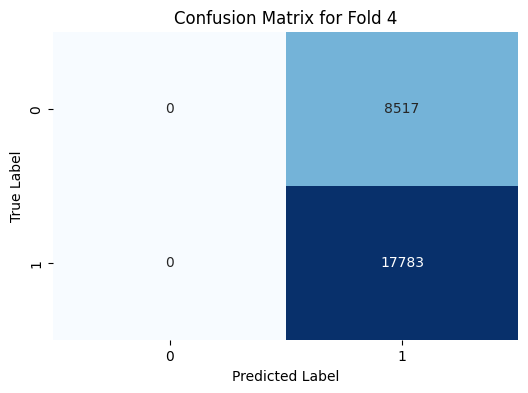

Fold 5
Early stopping triggered at epoch 6
Accuracy for fold 5: 66.97%
F1 Score for fold 5: 0.5372
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      8688
           1       0.67      1.00      0.80     17612

    accuracy                           0.67     26300
   macro avg       0.33      0.50      0.40     26300
weighted avg       0.45      0.67      0.54     26300



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


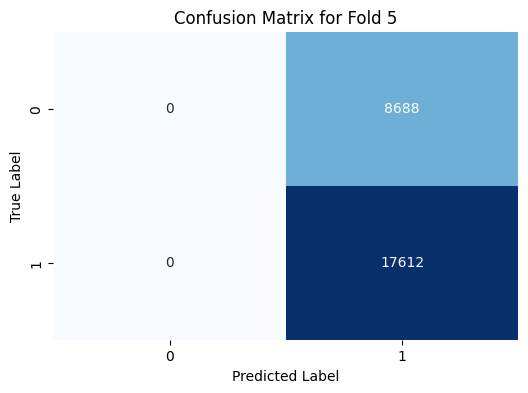

Fold 6
Early stopping triggered at epoch 6
Accuracy for fold 6: 67.15%
F1 Score for fold 6: 0.5396
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      8639
           1       0.67      1.00      0.80     17661

    accuracy                           0.67     26300
   macro avg       0.34      0.50      0.40     26300
weighted avg       0.45      0.67      0.54     26300



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


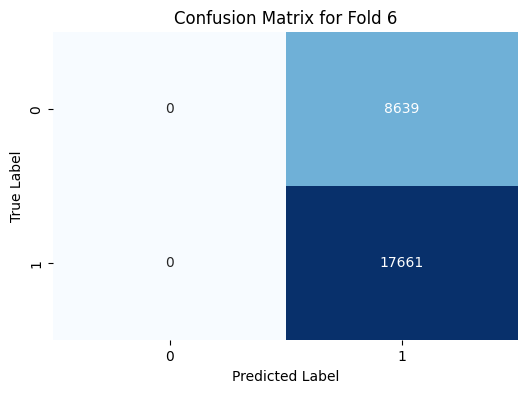

Fold 7
Early stopping triggered at epoch 6
Accuracy for fold 7: 67.24%
F1 Score for fold 7: 0.5407
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      8616
           1       0.67      1.00      0.80     17684

    accuracy                           0.67     26300
   macro avg       0.34      0.50      0.40     26300
weighted avg       0.45      0.67      0.54     26300



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


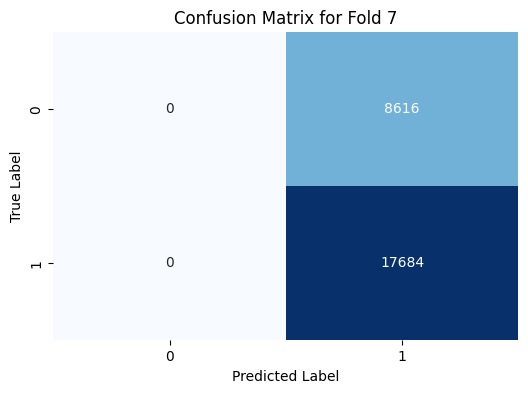

Fold 8


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
from sklearn.preprocessing import LabelEncoder
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load data
#data = pd.read_csv('email.csv')
# 2. Preprocessing: Label Encoding
le1 = LabelEncoder()
data['label'] = le1.fit_transform(data['label'])  # Ganti 'Label' sesuai dengan nama kolom asli
class_names = le1.classes_

# Cek apakah ada nilai hilang dan ganti dengan nilai yang sesuai
data.fillna(0, inplace=True)  # Mengisi nilai hilang dengan 0

# 3. Define Transformer Model
class TransformerModel(nn.Module):
    def __init__(self, input_dim, num_classes, d_model=64, nhead=2, num_layers=2):
        super(TransformerModel, self).__init__()
        self.embedding = nn.Linear(input_dim, d_model)  # Embedding Layer: Mengonversi input menjadi dimensi d_model
        self.transformer_encoder = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, batch_first=True),
            num_layers=num_layers # Menerapkan lapisan Transformer untuk menghasilkan representasi fitur
        )
        self.fc = nn.Linear(d_model, num_classes)  # Output layer

    def forward(self, x):
        x = self.embedding(x)  # Mengonversi input ke dimensi d_model
        x = x.unsqueeze(1)  # Tambahkan dimensi sequence (batch_size, seq_length, feature_dim)
        x = self.transformer_encoder(x)  # Memasukkan input ke Transformer
        x = x.mean(dim=1)  # Average pooling
        return self.fc(x)  # Final output untuk klasifikasi

# 4. KFold Cross-Validation
kf = KFold(n_splits=10, shuffle=True, random_state=50)
all_accuracy, all_f1_scores = [], []
conf_matrix_list = []
average_train_losses = []  # List to store average train losses for plotting
average_val_accuracies = []  # List to store validation accuracies for plotting

for fold, (train_index, val_index) in enumerate(kf.split(data)):
    print(f'Fold {fold + 1}')

    # Split data using .iloc to select rows by index
    X_train, X_val = data.drop(columns=['label']).iloc[train_index], data.drop(columns=['label']).iloc[val_index]
    y_train, y_val = data['label'].iloc[train_index], data['label'].iloc[val_index]

    numeric_columns = ['size', 'attachments'] #Hanya kolom numerik (size, attachments) yang digunakan untuk mengonversi data ke Tensor PyTorch agar bisa digunakan dalam model.

    # 2. Konversi ke PyTorch tensors
    X_train_tensor = torch.FloatTensor(X_train[numeric_columns].values)  # Ambil hanya kolom numerik
    y_train_tensor = torch.LongTensor(y_train.values)
    X_val_tensor = torch.FloatTensor(X_val[numeric_columns].values)  # Ambil hanya kolom numerik
    y_val_tensor = torch.LongTensor(y_val.values)


    # Create DataLoader
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

    # Initialize the model
    model = TransformerModel(input_dim=X_train_tensor.shape[1], num_classes=len(class_names))
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    # Early stopping setup
    best_accuracy = 0
    patience, trigger_times = 5, 0

    # Train the model
    num_epochs = 20  # Meningkatkan jumlah epoch
    train_losses = []  # List untuk menyimpan loss per epoch
    val_accuracies = []  # List untuk menyimpan akurasi per epoch

    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_loss = epoch_loss / len(train_loader)
        train_losses.append(avg_loss)

        # Validate the model
        model.eval()
        with torch.no_grad():
            y_pred_probs = model(X_val_tensor)
            _, y_pred = torch.max(y_pred_probs, 1)

        accuracy = accuracy_score(y_val, y_pred.numpy())
        val_accuracies.append(accuracy)

        # Save the best model
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            torch.save(model.state_dict(), f'model_best_fold_{fold + 1}.pt')
            trigger_times = 0
        else:
            trigger_times += 1

        if trigger_times >= patience:
            print(f'Early stopping triggered at epoch {epoch + 1}')
            break

    # Metrics calculation
    conf_matrix = confusion_matrix(y_val, y_pred.numpy())
    conf_matrix_list.append(conf_matrix)
    all_accuracy.append(accuracy)

    f1 = f1_score(y_val, y_pred.numpy(), average='weighted')
    all_f1_scores.append(f1)

    # Print results for the current fold
    print(f'Accuracy for fold {fold + 1}: {accuracy * 100:.2f}%')
    print(f'F1 Score for fold {fold + 1}: {f1:.4f}')
    #cls_report = classification_report(y_val, y_pred.numpy(), target_names=class_names)
    cls_report = classification_report(y_val, y_pred.numpy())
    print(cls_report)

    # Store average loss and accuracy for plotting
    average_train_losses.append(train_losses)
    average_val_accuracies.append(val_accuracies)

    # Plot confusion matrix for the current fold
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='.0f', cmap='Blues', cbar=False,
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for Fold {fold + 1}')
    plt.show()

# 5. Average Metrics Across All Folds
print(f'Average Accuracy: {np.mean(all_accuracy) * 100:.2f}%')
print(f'Average F1 Score: {np.mean(all_f1_scores):.4f}')

# 6. Plot the Average Confusion Matrix
average_conf_matrix = np.mean(conf_matrix_list, axis=0)

plt.figure(figsize=(8, 6))
sns.heatmap(average_conf_matrix, annot=True, fmt='.0f', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Average Confusion Matrix Across Folds')
plt.show()

# 7. Analysis of Results
print("Hasil Deteksi:")
for i, (acc, f1) in enumerate(zip(all_accuracy, all_f1_scores)):
    print(f'Fold {i + 1}: Akurasi = {acc * 100:.2f}%, F1 Score = {f1:.4f}')

# 8. Plot Loss and Accuracy for Each Fold
for fold in range(len(average_train_losses)):
    plt.figure(figsize=(12, 5))

    # Grafik Loss
    plt.subplot(1, 2, 1)
    plt.plot(average_train_losses[fold], label='Training Loss', marker='o')
    plt.title(f'Training Loss for Fold {fold + 1}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

    # Grafik Akurasi
    plt.subplot(1, 2, 2)
    plt.plot(average_val_accuracies[fold], label='Validation Accuracy', marker='o')
    plt.title(f'Validation Accuracy for Fold {fold + 1}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()


# **Hyperparameter Tuning**

In [ ]:
import itertools
import torch
import torch.nn as nn
from sklearn.metrics import accuracy_score

# Define the hyperparameters grid
param_grid = {
    'lr': [0.001, 0.0005],
    'batch_size': [16, 32],
    'nhead': [2, 4],
    'num_layers': [2, 3],
    'dropout': [0.2, 0.3],
    'd_model': [64, 128]  # Dapat juga menambah d_model
}

# Track the best model
best_accuracy = 0
best_params = None

# Loop over all combinations of hyperparameters
for lr, batch_size, nhead, num_layers, dropout, d_model in itertools.product(
        param_grid['lr'],
        param_grid['batch_size'],
        param_grid['nhead'],
        param_grid['num_layers'],
        param_grid['dropout'],
        param_grid['d_model']
    ):

    print(f'Training with lr={lr}, batch_size={batch_size}, nhead={nhead}, num_layers={num_layers}, dropout={dropout}, d_model={d_model}')

    # Reinitialize model with new hyperparameters
    model = TransformerModel(input_dim=X_bin.shape[1], num_classes=len(class_names),
                             d_model=d_model, nhead=nhead, num_layers=num_layers, dropout=dropout)

    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()

    # K-Fold training, you may integrate it here as well
    for fold, (train_index, val_index) in enumerate(kf.split(data)):
        print(f'Training Fold {fold + 1}')

        # Split data
        X_train, X_val = data.drop(columns=['label']).iloc[train_index], data.drop(columns=['label']).iloc[val_index]
        y_train, y_val = data['label'].iloc[train_index], data['label'].iloc[val_index]

        # Convert to PyTorch tensors
        X_train_tensor = torch.FloatTensor(X_train.values)
        y_train_tensor = torch.LongTensor(y_train.values)
        X_val_tensor = torch.FloatTensor(X_val.values)
        y_val_tensor = torch.LongTensor(y_val.values)

        # Create DataLoader with the new batch size
        train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

        # Train for a larger number of epochs
        num_epochs = 20  # Atau sesuai kebutuhan
        for epoch in range(num_epochs):
            model.train()
            epoch_loss = 0
            for inputs, labels in train_loader:
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                epoch_loss += loss.item()

            # Validate after each epoch
            model.eval()
            with torch.no_grad():
                y_pred_probs = model(X_val_tensor)
                _, y_pred = torch.max(y_pred_probs, 1)
                accuracy = accuracy_score(y_val, y_pred.numpy())

            print(f'Epoch {epoch + 1}, Validation Accuracy: {accuracy * 100:.2f}%')

    # Save best parameters
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = {
            'lr': lr,
            'batch_size': batch_size,
            'nhead': nhead,
            'num_layers': num_layers,
            'dropout': dropout,
            'd_model': d_model
        }

print(f'Best Params: {best_params} with Accuracy: {best_accuracy * 100:.2f}%')


Training with lr=0.001, batch_size=16, nhead=2
Validation Accuracy: 88.19%
Training with lr=0.001, batch_size=16, nhead=4
Validation Accuracy: 92.90%
Training with lr=0.001, batch_size=32, nhead=2
Validation Accuracy: 91.98%
Training with lr=0.001, batch_size=32, nhead=4
Validation Accuracy: 92.77%
Training with lr=0.0005, batch_size=16, nhead=2
Validation Accuracy: 93.05%
Training with lr=0.0005, batch_size=16, nhead=4
Validation Accuracy: 93.29%
Training with lr=0.0005, batch_size=32, nhead=2
Validation Accuracy: 91.39%
Training with lr=0.0005, batch_size=32, nhead=4
Validation Accuracy: 93.18%
Best Params: {'lr': 0.0005, 'batch_size': 16, 'nhead': 4} with Accuracy: 93.29%


# **CLASSIFICATION With Hyperparameter Tuning**
ganti parameter sesuai yang terbaik hasil hyperparameter tuning

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
from sklearn.preprocessing import LabelEncoder
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load data
# data = pd.read_csv('email.csv')

# 2. Preprocessing: Label Encoding
le1 = LabelEncoder()
data['label'] = le1.fit_transform(data['label'])  # Ganti 'Label' sesuai dengan nama kolom asli
class_names = le1.classes_

# Cek apakah ada nilai hilang dan ganti dengan nilai yang sesuai
data.fillna(0, inplace=True)  # Mengisi nilai hilang dengan 0

# 3. Define Transformer Model with updated nhead
class TransformerModel(nn.Module):
    def __init__(self, input_dim, num_classes, d_model=64, nhead=4, num_layers=2):
        super(TransformerModel, self).__init__()
        self.embedding = nn.Linear(input_dim, d_model)  # Embedding layer
        self.transformer_encoder = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, batch_first=True),
            num_layers=num_layers
        )
        self.fc = nn.Linear(d_model, num_classes)  # Output layer

    def forward(self, x):
        x = self.embedding(x)  # Embed the input features
        x = x.unsqueeze(1)  # Add sequence dimension (batch_size, seq_length, feature_dim)
        x = self.transformer_encoder(x)  # Pass through the transformer encoder
        x = x.mean(dim=1)  # Average pooling
        return self.fc(x)  # Final output

# 4. KFold Cross-Validation
kf = KFold(n_splits=10, shuffle=True, random_state=50)
all_accuracy, all_f1_scores = [], []
conf_matrix_list = []
average_train_losses = []  # List to store average train losses for plotting
average_val_accuracies = []  # List to store validation accuracies for plotting

for fold, (train_index, val_index) in enumerate(kf.split(data)):
    print(f'Fold {fold + 1}')

    # Split data using .iloc to select rows by index
    X_train, X_val = data.drop(columns=['label']).iloc[train_index], data.drop(columns=['label']).iloc[val_index]
    y_train, y_val = data['label'].iloc[train_index], data['label'].iloc[val_index]

    # Convert to PyTorch tensors
    X_train_tensor = torch.FloatTensor(X_train.values)
    y_train_tensor = torch.LongTensor(y_train.values)
    X_val_tensor = torch.FloatTensor(X_val.values)
    y_val_tensor = torch.LongTensor(y_val.values)

    # Create DataLoader with updated batch_size
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

    # Initialize the model
    model = TransformerModel(input_dim=X_train_tensor.shape[1], num_classes=len(class_names))
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.0005)  # Updated learning rate

    # Early stopping setup
    best_accuracy = 0
    patience, trigger_times = 5, 0

    # Train the model
    num_epochs = 20
    train_losses = []
    val_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_loss = epoch_loss / len(train_loader)
        train_losses.append(avg_loss)

        # Validate the model
        model.eval()
        with torch.no_grad():
            y_pred_probs = model(X_val_tensor)
            _, y_pred = torch.max(y_pred_probs, 1)

        accuracy = accuracy_score(y_val, y_pred.numpy())
        val_accuracies.append(accuracy)

        # Save the best model
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            torch.save(model.state_dict(), f'model_best_fold_{fold + 1}.pt')
            trigger_times = 0
        else:
            trigger_times += 1

        if trigger_times >= patience:
            print(f'Early stopping triggered at epoch {epoch + 1}')
            break

    # Metrics calculation
    conf_matrix = confusion_matrix(y_val, y_pred.numpy())
    conf_matrix_list.append(conf_matrix)
    all_accuracy.append(accuracy)

    f1 = f1_score(y_val, y_pred.numpy(), average='weighted')
    all_f1_scores.append(f1)

    # Print results for the current fold
    print(f'Accuracy for fold {fold + 1}: {accuracy * 100:.2f}%')
    print(f'F1 Score for fold {fold + 1}: {f1:.4f}')
    cls_report = classification_report(y_val, y_pred.numpy(), target_names=class_names)
    print(cls_report)

    # Store average loss and accuracy for plotting
    average_train_losses.append(train_losses)
    average_val_accuracies.append(val_accuracies)

    # Plot confusion matrix for the current fold
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='.0f', cmap='Blues', cbar=False,
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for Fold {fold + 1}')
    plt.show()

# 5. Average Metrics Across All Folds
print(f'Average Accuracy: {np.mean(all_accuracy) * 100:.2f}%')
print(f'Average F1 Score: {np.mean(all_f1_scores):.4f}')

# 6. Plot the Average Confusion Matrix
average_conf_matrix = np.mean(conf_matrix_list, axis=0)

plt.figure(figsize=(8, 6))
sns.heatmap(average_conf_matrix, annot=True, fmt='.0f', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Average Confusion Matrix Across Folds')
plt.show()
